# 🧪 Week 2: Object Detection with YOLOv8

In this lab, we'll use the [Ultralytics YOLOv8](https://docs.ultralytics.com) library to detect objects in images and videos.

We’ll cover:
- Installing YOLOv8
- Running object detection on an image
- Visualizing bounding boxes
- Optional: Detecting objects in videos or webcam


In [1]:
# 📦 Install dependencies (Uncomment if not installed)
!pip install ultralytics opencv-python matplotlib

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 24.3 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12

## 1️⃣ Load a Pre-trained YOLOv8 Model

In [2]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model (nano)
model = YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/jportilla/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 21.3MB/s]


## 2️⃣ Run Object Detection on an Image


image 1/1 /Users/jportilla/Downloads/cv-101-main/notebooks/../images/bananas.jpg: 608x640 1 surfboard, 2 bananas, 29.6ms
Speed: 1.6ms preprocess, 29.6ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 640)


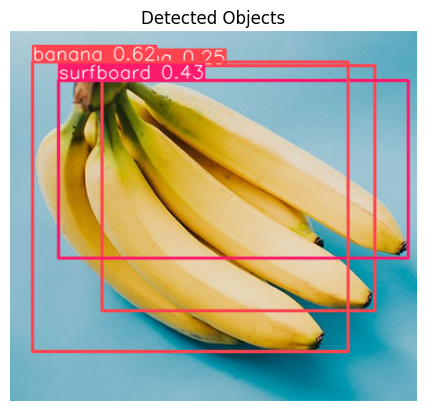

In [4]:
import cv2
import matplotlib.pyplot as plt

# Run prediction on a sample image
results = model("../images/bananas.jpg")  # Update with your own image if needed

# Visualize result
img_with_boxes = results[0].plot()
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Objects")
plt.show()

## 3️⃣ Optional: Object Detection in Video or Webcam

In [ ]:
# Detect objects in a video file
#example1_depth.mp4
# results = model.predict(source="../images/example1_edge.mp4", save=True, conf=0.5)
results = model.predict(source="../images/example1_depth.mp4", save=True, conf=0.5)

# Or detect using webcam (0 is default webcam index)
# model.predict(source=0, show=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/121) /Users/jportilla/Downloads/cv-101-main/notebooks/../images/example1_edge.mp4: 480x640 (no detections), 41.9ms
video 1/1 (frame 2/121) /Users/jportilla/Downloads/cv-101-main/notebooks/../images/example1_edge.mp4: 480x640 (no detections), 32.4ms
video 1/1 (frame 3/121) /Users/jportilla/Downloads/cv-101-main/notebooks/../images/example1_edge.mp4: 480x640 (no detections), 27.5ms
video 1/1 (frame 4/121) /Users/jportilla/Downloads/cv-

## 4️⃣ Bonus: Inspect Bounding Boxes and Classes

In [ ]:
# Access results directly
boxes = results[0].boxes
for i in range(len(boxes)):
    xyxy = boxes.xyxy[i].tolist()
    cls = int(boxes.cls[i])
    conf = float(boxes.conf[i])
    label = model.names[cls]
    print(f"{label} @ {xyxy} with {conf:.2f} confidence")